<a href="https://colab.research.google.com/github/ShaunZac/Neural-Network/blob/master/MNIST_keras_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Stuff

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras import layers
from keras import losses
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

Using TensorFlow backend.


# Loading the data and pre-processing it

In [2]:
(X_train_orig, Y_train), (X_test_orig, Y_test) = tf.keras.datasets.mnist.load_data()
Y_train = pd.get_dummies(pd.Series(Y_train).astype('category')).to_numpy()
Y_test = pd.get_dummies(pd.Series(Y_test).astype('category')).to_numpy()

X_train = X_train_orig/255.
X_test = X_test_orig/255.

train_ex = X_train.shape[0]
test_ex = X_test.shape[0]
X_train = X_train.reshape(train_ex, 28, 28, 1)
X_test = X_test.reshape(test_ex, 28, 28, 1)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)


# Defining my Model

In [0]:
def myModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]

    Returns:
    model -- a Model() instance in Keras
    """
      
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(10, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='myModel')    
    
    return model

## Training the model

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.1661 - accuracy: 0.9485 - val_loss: 0.0665 - val_accuracy: 0.9794
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0528 - val_accuracy: 0.9846
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.0428 - val_accuracy: 0.9862
Epoch 4/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0452 - val_accuracy: 0.9849
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0432 - val_accuracy: 0.9864
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0472 - val_accuracy: 0.9868
Epoch 7/20
60000/60000 [==============================] - 5s 81us/

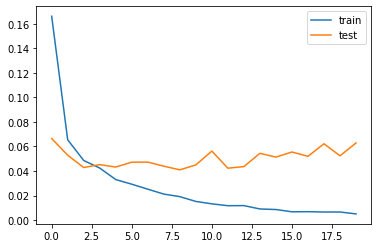

In [4]:
%matplotlib inline
model = myModel(X_train.shape[1:])
model.compile(loss=losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 20, batch_size = 64)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Let us train it for another 10 epochs and see the difference

In [5]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size = 64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0533 - val_accuracy: 0.9886
Epoch 2/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0525 - val_accuracy: 0.9881
Epoch 3/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0719 - val_accuracy: 0.9847
Epoch 4/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0559 - val_accuracy: 0.9880
Epoch 5/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0702 - val_accuracy: 0.9857
Epoch 6/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0607 - val_accuracy: 0.9874
Epoch 7/10
60000/60000 [==============================] - 5s 79us/st

## Inference

Here, we see that after ~7 epochs, the accuracy remains roughly constant, this is probably due to a large learning rate. Thus, we will now try to implement learning rate decay to get better results.

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.1416 - accuracy: 0.9565 - val_loss: 0.0668 - val_accuracy: 0.9778
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0553 - accuracy: 0.9824 - val_loss: 0.0658 - val_accuracy: 0.9789
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.0458 - val_accuracy: 0.9845
Epoch 4/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0379 - val_accuracy: 0.9876
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0368 - val_accuracy: 0.9876
Epoch 6/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0404 - val_accuracy: 0.9867
Epoch 7/20
60000/60000 [==============================] - 4s 74us/st

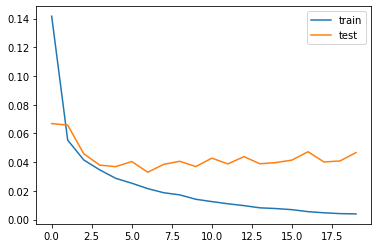

In [9]:
from keras import optimizers

model = myModel(X_train.shape[1:])
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 20, batch_size = 64)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Another model

Let us see the results when I add another layer convolutional layer to my model.

In [0]:
def otherModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]

    Returns:
    model -- a Model() instance in Keras
    """
      
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(16, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    #Second Layer of Stuff
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool2')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(20, activation='relu', name='fc1')(X)
    X = Dense(10, activation='sigmoid', name='fc2')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='myModel')    
    
    return model

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1715 - accuracy: 0.9491 - val_loss: 0.0752 - val_accuracy: 0.9749
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.0342 - val_accuracy: 0.9886
Epoch 3/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0326 - val_accuracy: 0.9900
Epoch 4/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.0334 - val_accuracy: 0.9895
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0404 - val_accuracy: 0.9871
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.0468 - val_accuracy: 0.9858
Epoch 7/20
60000/60000 [==============================] - 6s 1

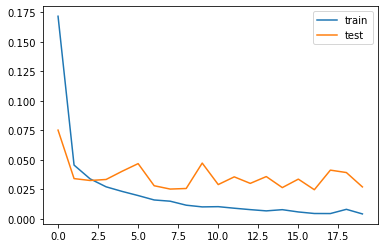

In [11]:
%matplotlib inline
model = otherModel(X_train.shape[1:])
model.compile(loss=losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 20, batch_size = 64)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

We can see that our second model performs better, we get an accuracy of 99.3% on our test data!